# Ensembles

In [1]:
# Get basic libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams['figure.figsize'] = [16,9]

In [2]:
# Get Classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Create metrics to store
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [4]:
# Create datasets for demo
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [5]:
X10, y = make_classification(n_samples = 100000, n_features=10, n_redundant=0, 
                             n_informative=10, random_state=123, n_classes = 2)

In [6]:
X = PCA(n_components=2).fit_transform(X10)
X = StandardScaler().fit_transform(X)

In [7]:
# Create train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

In [8]:
# Initiate the Classifiers
names = [
    "Naive Bayes",
    "ML Perceptron",
    "Nearest Neighbors",
    "Logistic Regression",
    "Random Forest",
    "Gradient Boosting"]

classifiers = [
    GaussianNB(),
    MLPClassifier(alpha=1),
    KNeighborsClassifier(3, n_jobs=-1),  
    LogisticRegression(n_jobs=-1),
    RandomForestClassifier(max_depth=3, n_estimators=50, n_jobs=-1),
    GradientBoostingClassifier(max_depth=3, n_estimators=10)
]

In [9]:
# Create mesh points for plotting the boundaries
step = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, step),np.arange(y_min, y_max, step))
xxyy = np.c_[xx.ravel(), yy.ravel()]

In [10]:
# Create array to store the predictions
y_pred = np.empty([y_test.shape[0],6])

CPU times: user 16.3 s, sys: 771 ms, total: 17 s
Wall time: 9.1 s


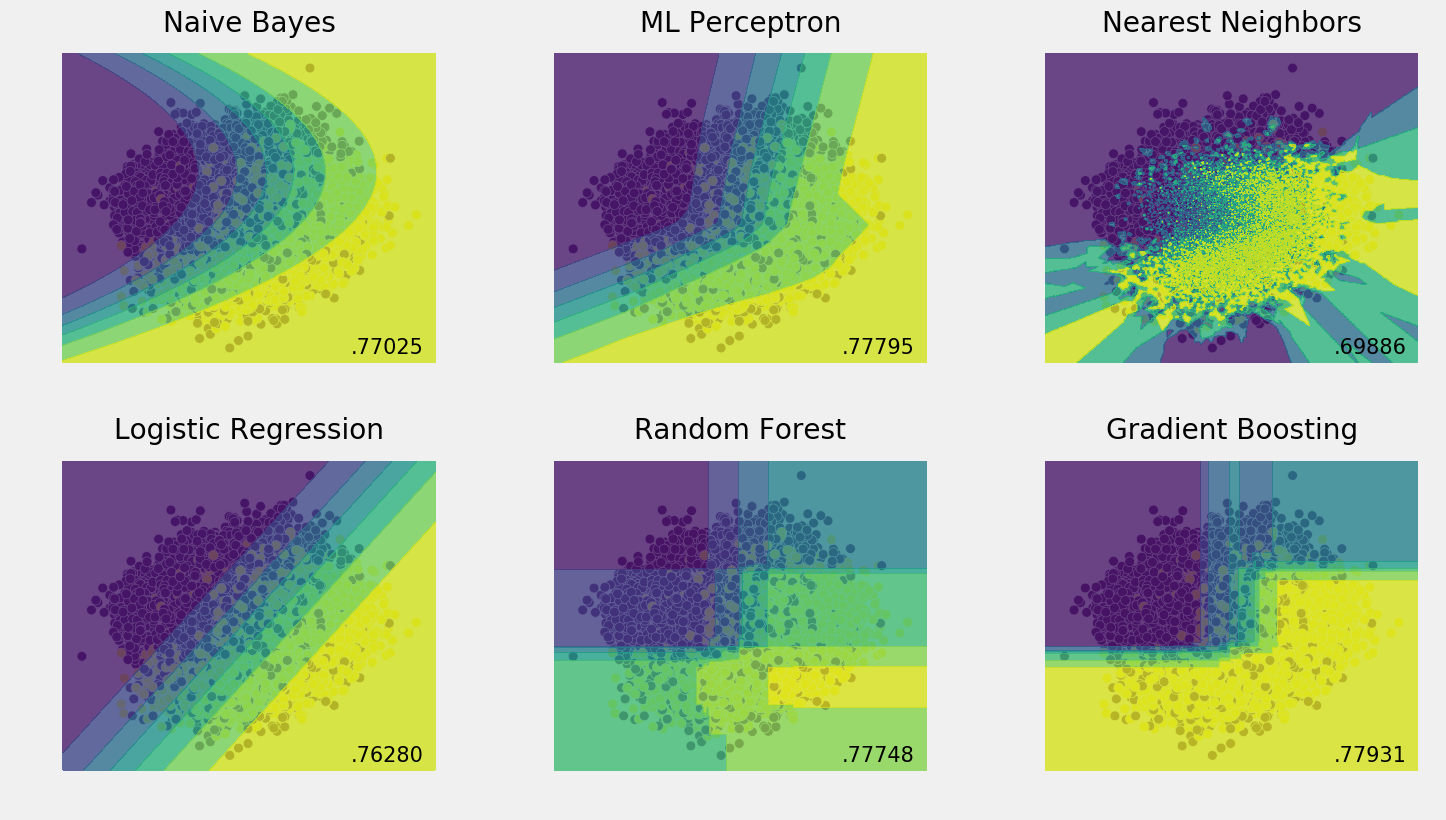

In [11]:
%%time
# Run the classifier, score and plot them
for idx in np.arange(6):
    clf = classifiers[idx]
    clf.fit(X_train, y_train)
    y_pred[:,idx] = clf.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, y_pred[:,idx])
        
    Z = clf.predict_proba(xxyy)[:, 1]
    Z = Z.reshape(xx.shape)
    
    plt.subplot(2, 3, idx + 1)
    plt.scatter(X[:,0], X[:,1], c=y, s=50)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.title(names[idx])
    plt.text(xx.max() - .3, yy.min() + .3, ('%.5f' % auc).lstrip('0'), size=15,
        horizontalalignment='right')
    plt.axis("off")
    idx += 1

In [12]:
y_ensemble = np.sum(y_pred, axis = 1)/y_pred.shape[1]

In [13]:
roc_auc_score(y_test, y_ensemble)

0.77606736753700933